In [35]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [101]:
# transrate scores
file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_scores_imicrobe_cds.csv"
file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv"

#busco evaluation - eukaryota
file_ncgr_busco = "../assembly_evaluation_data/busco_scores_imicrobe_eukaryota.csv"
file_dib_busco = "../assembly_evaluation_data/busco_scores_MMETSP_eukaryota_trinity2.2.0.csv"

#busco evaluation - protist
file_ncgr_busco_protist = "../assembly_evaluation_data/busco_scores_imicrobe_protist.csv"
file_dib_busco_protist = "../assembly_evaluation_data/busco_scores_MMETSP_protist_trinity2.2.0.csv"


#transrate reference metrics
file_ncgr_transrate = "../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv"
file_dib_transrate = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"

#transrate scores
ncgr_transrate_score = pd.read_csv(file_ncgr_transrate_scores, index_col='SampleName')
dib_transrate_score = pd.read_csv(file_dib_transrate_scores, index_col='SampleName')

ncgr_busco_protist = pd.read_csv(file_ncgr_busco_protist, index_col='Unnamed: 0')
ncgr_busco = pd.read_csv(file_ncgr_busco, index_col='Unnamed: 0')
dib_busco_protist = pd.read_csv(file_dib_busco_protist,index_col='Unnamed: 0')
dib_busco = pd.read_csv(file_dib_busco,index_col='Unnamed: 0')

ncgr_transrate = pd.read_csv(file_ncgr_transrate, index_col='SampleName')
dib_transrate = pd.read_csv(file_dib_transrate, index_col='SampleName')

In [84]:
ncgr_transrate_score.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
SampleName,,,,,,,,,,,,,,,,,,,,,
MMETSP0908,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,19864,148,15748,19004275,931.25534,2931,6804,7,11149,...,0.52175,91,0.00458,5838,0.29390,530,0.02668,0.21695,0.36033,0.50742
MMETSP1012,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,22648,148,10614,20357940,881.85032,2223,7239,1,14035,...,0.36242,201,0.00887,7119,0.31433,5606,0.24753,0.20972,0.22651,0.04483
MMETSP0044,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,331,148,542,66800,100.14804,198,0,0,2,...,0.19940,0,0.00000,0,0.00000,124,0.37462,0.00003,0.00008,0.12070
MMETSP0946,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,7080,150,7091,7248528,1018.17316,227,2863,0,5583,...,0.51088,633,0.08941,3892,0.54972,64,0.00904,0.05618,0.07841,0.40182
MMETSP1434,/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MME...,9658,148,6816,5734139,575.89252,990,1300,0,5161,...,0.30410,16,0.00166,2792,0.28909,1776,0.18389,0.12391,0.17191,0.26449


In [85]:
dib_transrate_score.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
SampleName,,,,,,,,,,,,,,,,,,,,,
MMETSP0321,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,34549,201,20215,28902999,836.57990,0,9363,10,15905,...,0.37958,2639,0.07638,13421,0.38846,2979,0.08623,0.28436,0.44191,0.35877
MMETSP0176,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,65912,201,13016,44715978,678.41938,0,13103,3,24264,...,0.43044,2946,0.04470,38536,0.58466,3226,0.04894,0.25457,0.41681,0.42742
MMETSP0707,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,31972,201,14540,28138287,880.09155,0,10079,4,16768,...,0.28928,900,0.02815,18858,0.58983,2036,0.06368,0.41495,0.49459,0.34565
MMETSP1447,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,37747,201,8750,24738347,655.37253,0,7279,0,14976,...,0.39044,1540,0.04080,20612,0.54606,2764,0.07322,0.24861,0.37155,0.31983
MMETSP1374,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,75410,201,6216,50603476,671.04464,0,16020,0,34443,...,0.21101,1378,0.01827,51595,0.68419,1669,0.02213,0.37305,0.50665,0.54700


In [98]:
dib_transrate_score = dib_transrate_score.drop_duplicates()
ncgr_transrate_score = ncgr_transrate_score.drop_duplicates()
dib_busco = dib_busco.drop_duplicates()
ncgr_busco = ncgr_busco.drop_duplicates()
dib_transrate = dib_transrate.drop_duplicates()
ncgr_transrate = ncgr_transrate.drop_duplicates()

In [87]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate_score.index) #special flowers are missing
ncnc=set(ncgr_transrate_score.index)
len(ddd.intersection(ncnc))

627

In [88]:
#checking the comparison of the two sets. 
ddd=set(dib_busco.index) #special flowers are missing
ncnc=set(ncgr_busco.index)
len(ddd.intersection(ncnc))

563

In [99]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate.index) #special flowers are missing
ncnc=set(ncgr_transrate.index)
len(ddd.intersection(ncnc))

635

In [56]:
pd.merge(ncgr_transrate_score, dib_transrate_score, left_index=True, right_index=True).columns

Index(['assembly_x', 'n_seqs_x', 'smallest_x', 'largest_x', 'n_bases_x',
       'mean_len_x', 'n_under_200_x', 'n_over_1k_x', 'n_over_10k_x',
       'n_with_orf_x', 'mean_orf_percent_x', 'n90_x', 'n70_x', 'n50_x',
       'n30_x', 'n10_x', 'gc_x', 'gc_skew_x', 'at_skew_x', 'cpg_ratio_x',
       'bases_n_x', 'proportion_n_x', 'linguistic_complexity_x', 'fragments_x',
       'fragments_mapped_x', 'p_fragments_mapped_x', 'good_mappings_x',
       'p_good_mapping_x', 'bad_mappings_x', 'potential_bridges_x',
       'bases_uncovered_x', 'p_bases_uncovered_x', 'contigs_uncovbase_x',
       'p_contigs_uncovbase_x', 'contigs_uncovered_x', 'p_contigs_uncovered_x',
       'contigs_lowcovered_x', 'p_contigs_lowcovered_x', 'contigs_segmented_x',
       'p_contigs_segmented_x', 'score_x', 'optimal_score_x', 'cutoff_x',
       'assembly_y', 'n_seqs_y', 'smallest_y', 'largest_y', 'n_bases_y',
       'mean_len_y', 'n_under_200_y', 'n_over_1k_y', 'n_over_10k_y',
       'n_with_orf_y', 'mean_orf_percent_y

In [57]:
pd.merge(ncgr_busco, dib_busco, left_index=True, right_index=True).columns

Index(['Complete_x', 'Fragmented_x', 'Missing_x', 'Total_x',
       'Complete_BUSCO_perc_x', 'Complete_y', 'Fragmented_y', 'Missing_y',
       'Total_y', 'Complete_BUSCO_perc_y'],
      dtype='object')

In [58]:
pd.merge(ncgr_transrate, dib_transrate, left_index=True, right_index=True).columns

Index(['assembly_x', 'n_seqs_x', 'smallest_x', 'largest_x', 'n_bases_x',
       'mean_len_x', 'n_under_200_x', 'n_over_1k_x', 'n_over_10k_x',
       'n_with_orf_x', 'mean_orf_percent_x', 'n90_x', 'n70_x', 'n50_x',
       'n30_x', 'n10_x', 'gc_x', 'gc_skew_x', 'at_skew_x', 'cpg_ratio_x',
       'bases_n_x', 'proportion_n_x', 'linguistic_complexity_x', 'CRBB_hits_x',
       'n_contigs_with_CRBB_x', 'p_contigs_with_CRBB_x', 'rbh_per_reference_x',
       'n_refs_with_CRBB_x', 'p_refs_with_CRBB_x', 'cov25_x', 'p_cov25_x',
       'cov50_x', 'p_cov50_x', 'cov75_x', 'p_cov75_x', 'cov85_x', 'p_cov85_x',
       'cov95_x', 'p_cov95_x', 'reference_coverage_x', 'score_x',
       'optimal_score_x', 'cutoff_x', 'Run_x', 'assembly_y', 'n_seqs_y',
       'smallest_y', 'largest_y', 'n_bases_y', 'mean_len_y', 'n_under_200_y',
       'n_over_1k_y', 'n_over_10k_y', 'n_with_orf_y', 'mean_orf_percent_y',
       'n90_y', 'n70_y', 'n50_y', 'n30_y', 'n10_y', 'gc_y', 'gc_skew_y',
       'at_skew_y', 'cpg_ratio_y

In [90]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='gray', color2='blue', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.5, lw=2)
    ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            color= color1, fontsize='x-large', fontweight='heavy')
    ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.15)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold')
    ax.set_axis_bgcolor('white')
    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='gray', color1='blue', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.85)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.85)
    ax.set_xticks([])
    ax.set_ylim([ymin, ymax])
    ax.set_axis_bgcolor('white')
    
def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.95):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold')
    return outdf, fig, ax

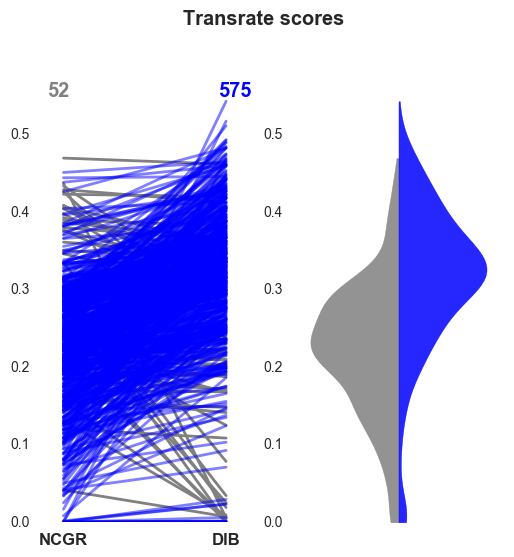

In [61]:
score,fig, ax = create_plots(ncgr_transrate_score,dib_transrate_score, 'score', 'Transrate scores',ymax=.6, ypos=0.55)
savefig('transrate.png')

In [62]:
score[score['NCGR']>score['DIB']]

,NCGR,DIB
SampleName,,
MMETSP1057,0.29300,0.00092
MMETSP0912,0.13097,0.00917
MMETSP0754,0.22723,0.00000
MMETSP1126,0.15602,0.00547
MMETSP0977,0.24040,0.23100
MMETSP0908,0.21695,0.21058
MMETSP0907,0.20640,0.20406
MMETSP0329,0.29359,0.01900
MMETSP0469,0.38013,0.36351


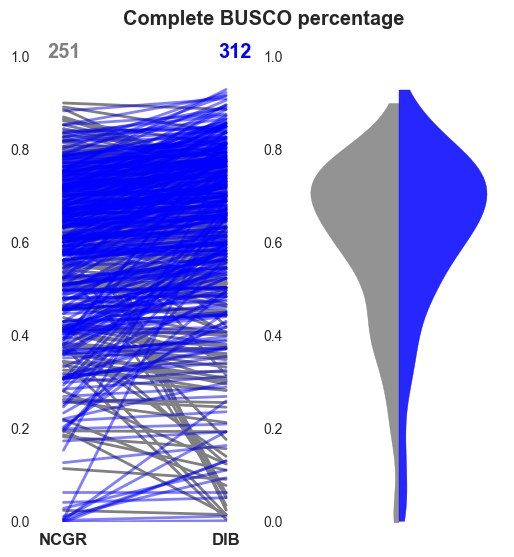

In [63]:
busco,fig, ax = create_plots(ncgr_busco,dib_busco, 'Complete_BUSCO_perc', 'Complete BUSCO percentage',ymax=1, ypos=1)
savefig('busco.png')

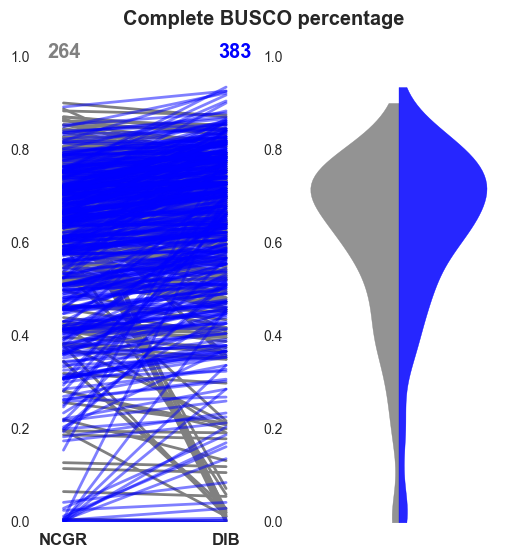

In [75]:
busco,fig, ax = create_plots(ncgr_busco_protist,dib_busco_protist, 'Complete_BUSCO_perc', 'Complete BUSCO percentage',ymax=1, ypos=1)

In [64]:
dib_transrate.head()

,assembly,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,n_with_orf,...,p_cov75,cov85,p_cov85,cov95,p_cov95,reference_coverage,score,optimal_score,cutoff,Run
SampleName,,,,,,,,,,,,,,,,,,,,,
MMETSP0271,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,153198,201,14115,105343189,687.62770,0,31210,12,68611,...,0.26219,23660,0.24088,20934,0.21313,0.31669,NaN,NaN,NaN,MMETSP0271
MMETSP1366,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,52229,201,7708,41734430,799.06623,0,14375,0,30948,...,0.35494,11156,0.33284,9906,0.29554,0.45616,NaN,NaN,NaN,MMETSP1366
MMETSP1103,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,27001,201,12574,31189705,1155.13148,0,11452,3,15981,...,0.50384,6783,0.49145,6583,0.47696,0.54132,NaN,NaN,NaN,MMETSP1103
MMETSP0014,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,63046,201,18219,86687899,1374.99443,0,30842,17,38948,...,0.19605,7593,0.17640,6753,0.15688,0.23250,NaN,NaN,NaN,MMETSP0014
MMETSP0916,/mnt/home/ljcohen/mmetsp_assemblies_trinity2.2...,32727,201,11857,23346435,713.36924,0,6303,8,16987,...,0.38004,7624,0.35971,6996,0.33008,0.44140,NaN,NaN,NaN,MMETSP0916


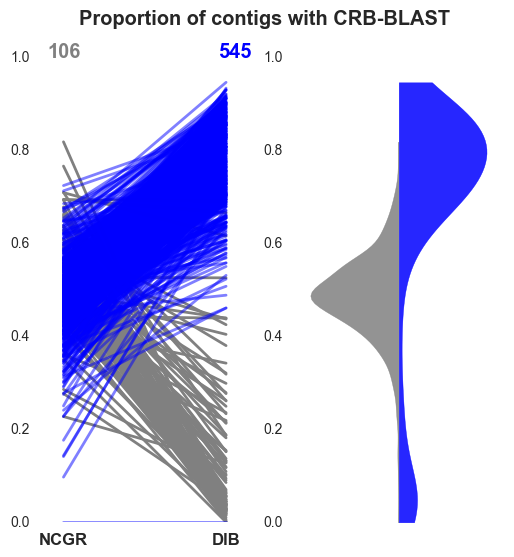

In [102]:
p_refs,fig, ax = create_plots(ncgr_transrate,dib_transrate, 'p_refs_with_CRBB', 'Proportion of contigs with CRB-BLAST',ymax=1, ypos=1)

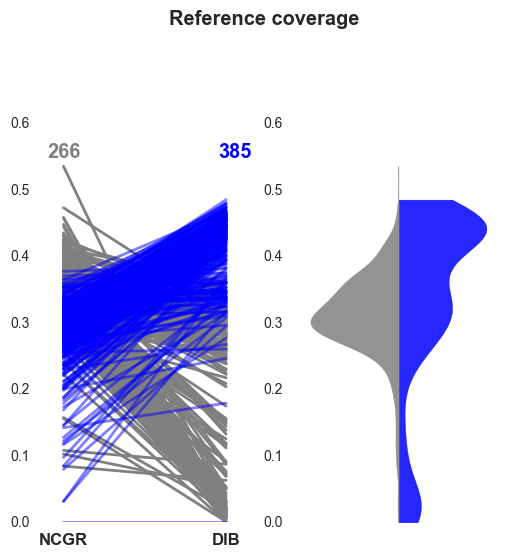

In [103]:
reference_coverage, fig, ax = create_plots(ncgr_transrate,dib_transrate, 'reference_coverage', 'Reference coverage'
                                           , ymax = 0.7, ypos = 0.55)

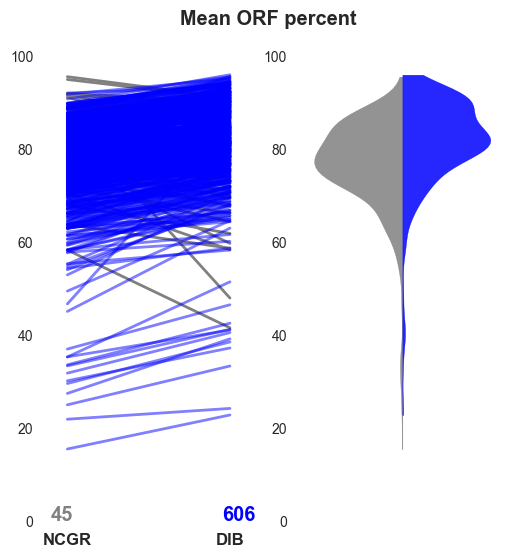

In [104]:
mean_orf_percent, fig, ax = create_plots(ncgr_transrate,dib_transrate, 'mean_orf_percent', 'Mean ORF percent',ymax=100, ypos=0.5)